In [28]:
import pandas as pd
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df.head()

,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


### 10 Year Bonds

In [29]:
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US20Y','US30Y'])
df.head()

,date,US10Y
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [30]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df = df[df.get('Year') >= 2020]
df.head()

,date,US10Y,Year
15131,2020-01-01,NaN,2020
15132,2020-01-02,1.88,2020
15133,2020-01-03,1.80,2020
15134,2020-01-06,1.81,2020
15135,2020-01-07,1.83,2020


In [31]:
df = df.dropna()
df.shape

(1120, 3)

In [32]:
df['Month'] = df['date'].dt.month
df = df.groupby("Month").mean()
df

,date,US10Y,Year
Month,,,
1,2022-01-19 22:05:56.435643648,2.461188,2022.009901
2,2022-02-21 17:30:00.000000000,2.547604,2022.020833
3,2022-03-02 20:32:25.945945856,2.464414,2021.963964
4,2022-04-15 20:34:17.142857216,2.607524,2022.000000
5,2022-06-05 11:12:00.000000000,2.704667,2022.057143
6,2022-04-13 22:48:00.000000000,2.545200,2021.830000
7,2021-12-30 19:05:03.614457856,2.136386,2021.457831
8,2022-02-28 19:24:56.629213440,2.296517,2021.539326
9,2022-03-11 02:18:47.710843392,2.465301,2021.481928


<Axes: xlabel='Month'>

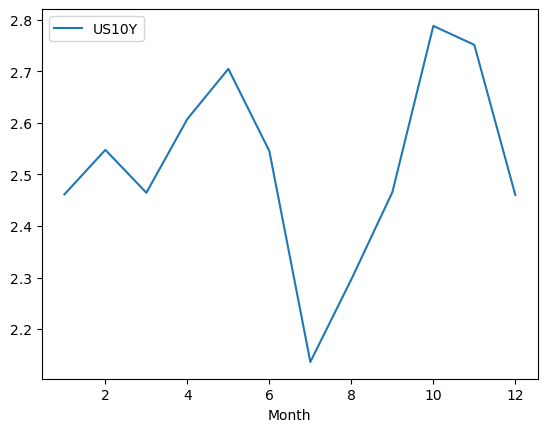

In [33]:
import matplotlib
df.plot(kind = "line", y = "US10Y")

In [72]:
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US20Y','US30Y'])
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df = df[df.get('Year') >= 2020]
df = df.dropna()
df

,date,US10Y,Year,Month
15132,2020-01-02,1.88,2020,1
15133,2020-01-03,1.80,2020,1
15134,2020-01-06,1.81,2020,1
15135,2020-01-07,1.83,2020,1
15136,2020-01-08,1.87,2020,1
...,...,...,...,...
16293,2024-06-14,4.20,2024,6
16294,2024-06-17,4.28,2024,6
16295,2024-06-18,4.22,2024,6
16297,2024-06-20,4.25,2024,6


In [73]:
from scipy.stats import ttest_ind

results = []

for month in range(1, 13):

    this_month = df.loc[df['Month'] == month, 'US10Y'].dropna()
    other_months = df.loc[df['Month'] != month, 'US10Y'].dropna()

    t_stat, p_value = ttest_ind(this_month, other_months, equal_var=False)

    results.append({
        'Month': month,
        'Mean (this month)': this_month.mean(),
        'Mean (others)': other_months.mean(),
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant (p < 0.05)': p_value < 0.05
    })

ttest_df = pd.DataFrame(results)

ttest_df = ttest_df.round({'Monthly Mean': 2, 'T-Statistic': 2, 'P-Value': 4})

ttest_df = ttest_df.sort_values(['Month'])

print(ttest_df.to_string(index=False))

 Month  Mean (this month)  Mean (others)  T-Statistic  P-Value  Significant (p < 0.05)
     1           2.461188       2.526565        -0.53   0.5959                   False
     2           2.547604       2.518145         0.22   0.8247                   False
     3           2.464414       2.526858        -0.49   0.6228                   False
     4           2.607524       2.511685         0.68   0.4999                   False
     5           2.704667       2.501635         1.45   0.1495                   False
     6           2.545200       2.518265         0.19   0.8487                   False
     7           2.136386       2.551427        -2.79   0.0064                    True
     8           2.296517       2.540019        -1.59   0.1148                   False
     9           2.465301       2.525101        -0.35   0.7294                   False
    10           2.787927       2.499557         1.52   0.1321                   False
    11           2.751250       2.502933   

### 20 Year Bonds

In [34]:
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US10Y','US30Y'])
df.head()

,date,US20Y
0,1962-01-02,4.07
1,1962-01-03,4.07
2,1962-01-04,4.06
3,1962-01-05,4.07
4,1962-01-08,4.08


In [35]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df = df[df.get('Year') >= 2020]
df = df.dropna()
df.head()

,date,US20Y,Year
15132,2020-01-02,2.19,2020
15133,2020-01-03,2.11,2020
15134,2020-01-06,2.13,2020
15135,2020-01-07,2.16,2020
15136,2020-01-08,2.21,2020


In [36]:
df['Month'] = df['date'].dt.month
df = df.groupby("Month").mean()
df

,date,US20Y,Year
Month,,,
1,2022-01-19 22:05:56.435643648,2.829406,2022.009901
2,2022-02-21 17:30:00.000000000,2.904063,2022.020833
3,2022-03-02 20:32:25.945945856,2.853964,2021.963964
4,2022-04-15 20:34:17.142857216,2.965524,2022.000000
5,2022-06-05 11:12:00.000000000,3.105429,2022.057143
6,2022-04-13 22:48:00.000000000,2.956100,2021.830000
7,2021-12-30 19:05:03.614457856,2.568795,2021.457831
8,2022-02-28 19:24:56.629213440,2.738539,2021.539326
9,2022-03-11 02:18:47.710843392,2.866747,2021.481928


<Axes: xlabel='Month'>

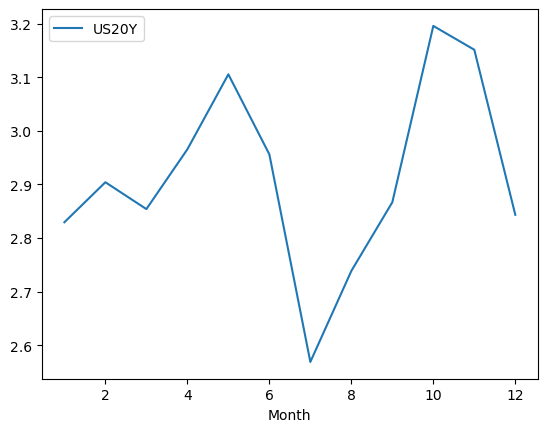

In [37]:
import matplotlib
df.plot(kind = "line", y = "US20Y")

In [70]:
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US10Y','US30Y'])
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df = df[df.get('Year') >= 2020]
df = df.dropna()
df

,date,US20Y,Year,Month
15132,2020-01-02,2.19,2020,1
15133,2020-01-03,2.11,2020,1
15134,2020-01-06,2.13,2020,1
15135,2020-01-07,2.16,2020,1
15136,2020-01-08,2.21,2020,1
...,...,...,...,...
16293,2024-06-14,4.46,2024,6
16294,2024-06-17,4.52,2024,6
16295,2024-06-18,4.47,2024,6
16297,2024-06-20,4.49,2024,6


In [71]:
from scipy.stats import ttest_ind

results = []

for month in range(1, 13):

    this_month = df.loc[df['Month'] == month, 'US20Y'].dropna()
    other_months = df.loc[df['Month'] != month, 'US20Y'].dropna()

    t_stat, p_value = ttest_ind(this_month, other_months, equal_var=False)

    results.append({
        'Month': month,
        'Mean (this month)': this_month.mean(),
        'Mean (others)': other_months.mean(),
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant (p < 0.05)': p_value < 0.05
    })

ttest_df = pd.DataFrame(results)

ttest_df = ttest_df.round({'Monthly Mean': 2, 'T-Statistic': 2, 'P-Value': 4})

ttest_df = ttest_df.sort_values(['Month'])

print(ttest_df.to_string(index=False))

 Month  Mean (this month)  Mean (others)  T-Statistic  P-Value  Significant (p < 0.05)
     1           2.829406       2.923798        -0.81   0.4183                   False
     2           2.904063       2.916338        -0.10   0.9204                   False
     3           2.853964       2.922032        -0.58   0.5635                   False
     4           2.965524       2.910089         0.42   0.6775                   False
     5           3.105429       2.895616         1.61   0.1105                   False
     6           2.956100       2.911284         0.35   0.7267                   False
     7           2.568795       2.943018        -2.69   0.0084                    True
     8           2.738539       2.930543        -1.34   0.1847                   False
     9           2.866747       2.919171        -0.33   0.7430                   False
    10           3.195732       2.893131         1.69   0.0942                   False
    11           3.151250       2.897135   

### 30 Year Bonds

In [57]:
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US10Y','US20Y'])
df.head()

,date,US30Y
0,1962-01-02,NaN
1,1962-01-03,NaN
2,1962-01-04,NaN
3,1962-01-05,NaN
4,1962-01-08,NaN


In [58]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df = df[df.get('Year') >= 2020]
df = df.dropna()
df.head()

,date,US30Y,Year
15132,2020-01-02,2.33,2020
15133,2020-01-03,2.26,2020
15134,2020-01-06,2.28,2020
15135,2020-01-07,2.31,2020
15136,2020-01-08,2.35,2020


In [59]:
df['Month'] = df['date'].dt.month
df = df.groupby("Month").mean()
df

,date,US30Y,Year
Month,,,
1,2022-01-19 22:05:56.435643648,2.830792,2022.009901
2,2022-02-21 17:30:00.000000000,2.903229,2022.020833
3,2022-03-02 20:32:25.945945856,2.838649,2021.963964
4,2022-04-15 20:34:17.142857216,2.948476,2022.000000
5,2022-06-05 11:12:00.000000000,3.092571,2022.057143
6,2022-04-13 22:48:00.000000000,2.921600,2021.830000
7,2021-12-30 19:05:03.614457856,2.540482,2021.457831
8,2022-02-28 19:24:56.629213440,2.708989,2021.539326
9,2022-03-11 02:18:47.710843392,2.827831,2021.481928


<Axes: xlabel='Month'>

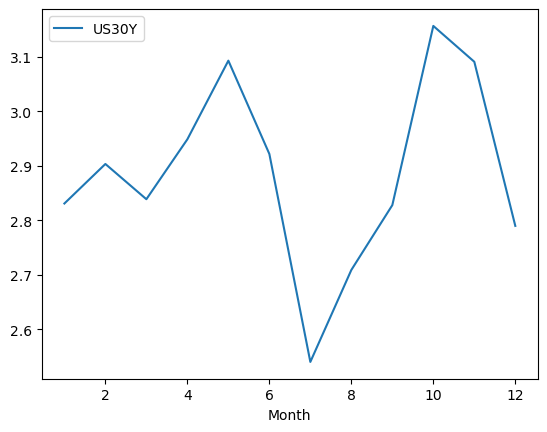

In [42]:
import matplotlib
df.plot(kind = "line", y = "US30Y")

In [66]:
df = pd.read_csv('data/us_treasury_yields_daily.csv')
df = df.drop(columns = ['US1M','US3M','US6M','US1Y','US2Y','US3Y','US5Y','US7Y','US10Y','US20Y'])
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df = df[df.get('Year') >= 2020]
df = df.dropna()
df

,date,US30Y,Year,Month
15132,2020-01-02,2.33,2020,1
15133,2020-01-03,2.26,2020,1
15134,2020-01-06,2.28,2020,1
15135,2020-01-07,2.31,2020,1
15136,2020-01-08,2.35,2020,1
...,...,...,...,...
16293,2024-06-14,4.34,2024,6
16294,2024-06-17,4.40,2024,6
16295,2024-06-18,4.36,2024,6
16297,2024-06-20,4.39,2024,6


In [67]:
from scipy.stats import ttest_ind

results = []

for month in range(1, 13):

    this_month = df.loc[df['Month'] == month, 'US30Y'].dropna()
    other_months = df.loc[df['Month'] != month, 'US30Y'].dropna()

    t_stat, p_value = ttest_ind(this_month, other_months, equal_var=False)

    results.append({
        'Month': month,
        'Mean (this month)': this_month.mean(),
        'Mean (others)': other_months.mean(),
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant (p < 0.05)': p_value < 0.05
    })

ttest_df = pd.DataFrame(results)

ttest_df = ttest_df.round({'Monthly Mean': 2, 'T-Statistic': 2, 'P-Value': 4})

ttest_df = ttest_df.sort_values(['Month'])

print(ttest_df.to_string(index=False))

 Month  Mean (this month)  Mean (others)  T-Statistic  P-Value  Significant (p < 0.05)
     1           2.830792       2.895113        -0.62   0.5360                   False
     2           2.903229       2.888008         0.14   0.8903                   False
     3           2.838649       2.894886        -0.53   0.5954                   False
     4           2.948476       2.883192         0.54   0.5899                   False
     5           3.092571       2.868286         1.92   0.0575                   False
     6           2.921600       2.886147         0.32   0.7527                   False
     7           2.540482       2.917232        -3.17   0.0021                    True
     8           2.708989       2.904879        -1.56   0.1220                   False
     9           2.827831       2.894233        -0.48   0.6358                   False
    10           3.156220       2.868227         1.81   0.0744                   False
    11           3.090500       2.873837   

### Results

Only July is statistically significant. Its yields are significantly lower than the yields of other months. 